In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import mne
import os.path as op
#from .utils import (check_fname, logger, verbose, _get_stim_channel, warn,
 #                   _validate_type, _check_option)
import os
from os.path import join
import xml.etree.ElementTree as ET
#import pyedflib
import numpy as np
import pickle
import pyeeg
import csv
from pathlib import Path
import pandas as pd
import glob
import mne
import pywt
import entropy
import scipy
# from scipy import signal
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
def is_integer(s, base=10):
        try:
                val = int(s, base)
                return True
        except ValueError:
                return False
emotion_tag = []
filename_tag = []
def process_session(root_dir, filename, files, folder_to_save):
        tree = ET.parse(join(root_dir, filename))
#         print(root_dir)
        root = tree.getroot()
        session_id = str(root.get('sessionId'));
        felt_emo = str(root.get('feltEmo'))
        if is_integer(session_id) and is_integer(felt_emo):
                felt_emo = int(felt_emo, 10)
                print("EMOTIONS_UPPPPPPP",felt_emo)
#                 f_emo.append(felt_emo)
                for file in files:
                    if file.lower().endswith('.bdf'):
                       print(felt_emo, join(root_dir, file)) 
                        # channels taken-> F3-F4, F7-F8, FC1-FC2, FC5- FC6, and FP1- FP2
                       raw=mne.io.read_raw_bdf(join(root_dir, file),preload=True,exclude = ['AF3','T7', 'CP1', 'Oz','Cz', 'T8', 'CP6', 'CP2', 'PO4','C3','CP5','P3', 'P7', 'PO3', 'O1','Pz','AF4', 'Fz', 'C4','P4', 'P8','O2','EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1','GSR2', 'Erg1', 'Erg2', 'Resp', 'Temp', 'Status'])
                       print("-----------------+++++++++++++++++++++",)
                       print(raw.info['ch_names'])
#                        print("FFFFFFile",file)
                       print("---------------------------------------------------")
                       filteredData = raw.copy()
                       final_filtered_data = filteredData.filter(1, 40, method='iir')
                       print("filteredt data",final_filtered_data)
                       emotion_tag.append(felt_emo)
                    
                       np.save('content/new_channels_npy/'+"{}_{}_filtered.npy".format(file.split('.')[0],felt_emo),
                        final_filtered_data[:][0])
#                        with open(file.split('.')[0]+'_filtered.npy')
                return raw

def  process_all_sessions(folder_with_sessions, folder_to_save):
        for root, dirs, files in os.walk(folder_with_sessions):
                if 'session.xml' in files:
                        process_session(root, 'session.xml', files, folder_to_save)




process_all_sessions('content/Sessions', '.content/train_data_new_channels')

EMOTIONS_UPPPPPPP 0
0 content/Sessions/10/Part_1_S_Trial5_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/10/Part_1_S_Trial5_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_1_S_Trial5_emotion.bdf, 10 x 42496 (166.0 s), ~3.3 MB, data loaded>
EMOTIONS_UPPPPPPP 2
2 content/Sessions/1042/Part_9_S_Trial1_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/A

Creating raw.info structure...
Reading 0 ... 45567  =      0.000 ...   177.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_9_S_Trial9_emotion.bdf, 10 x 45568 (178.0 s), ~3.5 MB, data loaded>
EMOTIONS_UPPPPPPP 5
5 content/Sessions/1060/Part_9_S_Trial10_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1060/Part_9_S_Trial10_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38143  =      0.000 ...   148.996 secs...
-----------------++++++++

---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_10_S_Trial4_emotion.bdf, 10 x 33792 (132.0 s), ~2.6 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/1180/Part_10_S_Trial5_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1180/Part_10_S_Trial5_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 34047  =      0.000 ...   132.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-

Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_10_S_Trial13_emotion.bdf, 10 x 40448 (158.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/1198/Part_10_S_Trial14_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1198/Part_10_S_Trial14_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  =      0.000 ...   119.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effec


filteredt data <RawEDF | Part_11_S_Trial1_emotion.bdf, 10 x 33792 (132.0 s), ~2.6 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/1304/Part_11_S_Trial2_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1304/Part_11_S_Trial2_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37887  =      0.000 ...   147.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_11_S_Trial2_emotion.bdf, 10 x 37888 (148.0 s), ~2.9 MB, data loaded>
EMOTIONS_UP

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  =      0.000 ...   119.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_11_S_Trial10_emotion.bdf, 10 x 30720 (120.0 s), ~2.4 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/1322/Part_11_S_Trial11_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1322/Part_11_S_Trial11_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40703  =   

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_11_S_Trial19_emotion.bdf, 10 x 37632 (147.0 s), ~2.9 MB, data loaded>
EMOTIONS_UPPPPPPP 5
5 content/Sessions/134/Part_2_S_Trial2_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/134/Part_2_S_Trial2_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38143  =      0.000 ...   148.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_2_S_Trial8_emotion.bdf, 10 x 40704 (159.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 1
1 content/Sessions/148/Part_2_S_Trial9_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/148/Part_2_S_Trial9_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35327  =      0.000 ...   137.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_2_S_Trial9_emotion.bdf, 10 x 35328 (138.

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29439  =      0.000 ...   114.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_13_S_Trial5_emotion.bdf, 10 x 29440 (115.0 s), ~2.3 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/1572/Part_13_S_Trial6_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1572/Part_13_S_Trial6_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_13_S_Trial13_emotion.bdf, 10 x 30720 (120.0 s), ~2.4 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/1588/Part_13_S_Trial14_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1588/Part_13_S_Trial14_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpa

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_13_S_Trial20_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 1
1 content/Sessions/162/Part_2_S_Trial16_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/162/Part_2_S_Trial16_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_2_S_Trial16_emotion.bdf, 10 x 38400 

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_14_S_Trial5_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 1
1 content/Sessions/1702/Part_14_S_Trial6_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1702/Part_14_S_Trial6_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 44799  =      

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_14_S_Trial14_emotion.bdf, 10 x 40448 (158.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 2
2 content/Sessions/1720/Part_14_S_Trial15_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1720/Part_14_S_Trial15_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 29439  =      0.000 ...   114.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_16_S_Trial2_emotion.bdf, 10 x 24576 (96.0 s), ~1.9 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/1956/Part_16_S_Trial3_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1956/Part_16_S_Trial3_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_16_S_Trial3_emotion.bdf, 10 x 4249

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  =      0.000 ...   119.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_16_S_Trial12_emotion.bdf, 10 x 30720 (120.0 s), ~2.4 MB, data loaded>
EMOTIONS_UPPPPPPP 5
5 content/Sessions/1976/Part_16_S_Trial13_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/1976/Part_16_S_Trial13_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38143  =   

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_17_S_Trial3_emotion.bdf, 10 x 44800 (175.0 s), ~3.4 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/2088/Part_17_S_Trial4_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2088/Part_17_S_Trial4_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37631  =      0.000 ...   146.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_17_S_Trial12_emotion.bdf, 10 x 40704 (159.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/2106/Part_17_S_Trial13_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2106/Part_17_S_Trial13_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_17_S_Trial13_emotion.bdf, 10 x 3

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_18_S_Trial1_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/2214/Part_18_S_Trial2_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2214/Part_18_S_Trial2_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37631  =    

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_18_S_Trial10_emotion.bdf, 10 x 40704 (159.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/2232/Part_18_S_Trial11_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2232/Part_18_S_Trial11_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  =      0.000 ...   119.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass

- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_18_S_Trial19_emotion.bdf, 10 x 37888 (148.0 s), ~2.9 MB, data loaded>
EMOTIONS_UPPPPPPP 6
6 content/Sessions/2250/Part_18_S_Trial20_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2250/Part_18_S_Trial20_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 33791  =      0.000 ...   131.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filtered

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_19_S_Trial9_emotion.bdf, 10 x 42496 (166.0 s), ~3.3 MB, data loaded>
EMOTIONS_UPPPPPPP 3
3 content/Sessions/2360/Part_19_S_Trial10_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2360/Part_19_S_Trial10_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 34047  =    

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_19_S_Trial18_emotion.bdf, 10 x 33792 (132.0 s), ~2.6 MB, data loaded>
EMOTIONS_UPPPPPPP 12
12 content/Sessions/2378/Part_19_S_Trial19_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2378/Part_19_S_Trial19_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38143  =      0.000 ...   148.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpa

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_20_S_Trial6_emotion.bdf, 10 x 40704 (159.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 3
3 content/Sessions/2484/Part_20_S_Trial7_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2484/Part_20_S_Trial7_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...    95.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_20_S_Trial7_emotion.bdf, 10 x 24576

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 33791  =      0.000 ...   131.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_20_S_Trial16_emotion.bdf, 10 x 33792 (132.0 s), ~2.6 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/2504/Part_20_S_Trial17_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2504/Part_20_S_Trial17_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40447  =   

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_21_S_Trial4_emotion.bdf, 10 x 40704 (159.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/2610/Part_21_S_Trial5_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2610/Part_21_S_Trial5_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37631  =      0.000 ...   146.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_21_S_Trial12_emotion.bdf, 10 x 26624 (104.0 s), ~2.1 MB, data loaded>
EMOTIONS_UPPPPPPP 6
6 content/Sessions/2626/Part_21_S_Trial13_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2626/Part_21_S_Trial13_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_21_S_Trial13_emotion.bdf, 10 x 4

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 34047  =      0.000 ...   132.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_3_S_Trial3_emotion.bdf, 10 x 34048 (133.0 s), ~2.6 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/268/Part_3_S_Trial4_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/268/Part_3_S_Trial4_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_22_S_Trial5_emotion.bdf, 10 x 40448 (158.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 2
2 content/Sessions/2742/Part_22_S_Trial6_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2742/Part_22_S_Trial6_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35327  =      0.000 ...   137.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass ze

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_22_S_Trial14_emotion.bdf, 10 x 37888 (148.0 s), ~2.9 MB, data loaded>
EMOTIONS_UPPPPPPP 6
6 content/Sessions/276/Part_3_S_Trial8_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/276/Part_3_S_Trial8_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37887  =      0.000 ...   147.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_3_S_Trial8_emotion.bdf, 10 x 37888 (14

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38143  =      0.000 ...   148.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_3_S_Trial10_emotion.bdf, 10 x 38144 (149.0 s), ~2.9 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/282/Part_3_S_Trial11_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/282/Part_3_S_Trial11_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40447  =      0.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_23_S_Trial6_emotion.bdf, 10 x 29440 (115.0 s), ~2.3 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/2874/Part_23_S_Trial7_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2874/Part_23_S_Trial7_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40447  =      0.000 ...   157.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters


- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_23_S_Trial14_emotion.bdf, 10 x 38144 (149.0 s), ~2.9 MB, data loaded>
EMOTIONS_UPPPPPPP 5
5 content/Sessions/2890/Part_23_S_Trial15_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2890/Part_23_S_Trial15_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 44799  =      0.000 ...   174.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filtered

EMOTIONS_UPPPPPPP 12
12 content/Sessions/2992/Part_24_S_Trial1_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/2992/Part_24_S_Trial1_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 34047  =      0.000 ...   132.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_24_S_Trial1_emotion.bdf, 10 x 34048 (133.0 s), ~2.6 MB, data loaded>
EMOTIONS_UPPPPPPP 2
2 content/Sessions/2994/Part_24_S_Trial2_emotion.bdf
Extracting EDF parameters from /Volu

Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40447  =      0.000 ...   157.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_24_S_Trial9_emotion.bdf, 10 x 40448 (158.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/3010/Part_24_S_Trial10_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3010/Part_24_S_Trial10_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37887  =      0.000 ...   14

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_24_S_Trial18_emotion.bdf, 10 x 30720 (120.0 s), ~2.4 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/3028/Part_24_S_Trial19_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3028/Part_24_S_Trial19_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter paramete

- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_25_S_Trial7_emotion.bdf, 10 x 30720 (120.0 s), ~2.4 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/3136/Part_25_S_Trial8_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3136/Part_25_S_Trial8_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37887  =      0.000 ...   147.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt

EMOTIONS_UPPPPPPP 3
3 content/Sessions/3154/Part_25_S_Trial17_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3154/Part_25_S_Trial17_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...    95.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_25_S_Trial17_emotion.bdf, 10 x 24576 (96.0 s), ~1.9 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/3156/Part_25_S_Trial18_emotion.bdf
Extracting EDF parameters from /Vol

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35327  =      0.000 ...   137.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_27_S_Trial5_emotion.bdf, 10 x 35328 (138.0 s), ~2.7 MB, data loaded>
EMOTIONS_UPPPPPPP 5
5 content/Sessions/3392/Part_27_S_Trial6_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3392/Part_27_S_Trial6_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38143  =      

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_27_S_Trial13_emotion.bdf, 10 x 45568 (178.0 s), ~3.5 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/3408/Part_27_S_Trial14_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3408/Part_27_S_Trial14_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters

- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_28_S_Trial2_emotion.bdf, 10 x 37888 (148.0 s), ~2.9 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/3516/Part_28_S_Trial3_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3516/Part_28_S_Trial3_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   103.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt d

EMOTIONS_UPPPPPPP 0
0 content/Sessions/3534/Part_28_S_Trial12_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3534/Part_28_S_Trial12_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_28_S_Trial12_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 2
2 content/Sessions/3536/Part_28_S_Trial13_emotion.bdf
Extracting EDF parameters from /Vo

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40703  =      0.000 ...   158.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_1_S_Trial18_emotion.bdf, 10 x 40704 (159.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/3642/Part_29_S_Trial1_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3642/Part_29_S_Trial1_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37887  =    

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_29_S_Trial9_emotion.bdf, 10 x 35328 (138.0 s), ~2.7 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/3660/Part_29_S_Trial10_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3660/Part_29_S_Trial10_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_29_S_Trial18_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/3678/Part_29_S_Trial19_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3678/Part_29_S_Trial19_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40447  =      0.000 ...   157.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filtered

EMOTIONS_UPPPPPPP 0
0 content/Sessions/3786/Part_30_S_Trial8_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3786/Part_30_S_Trial8_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_30_S_Trial8_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/3788/Part_30_S_Trial9_emotion.bdf
Extracting EDF parameters from /Volu

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_30_S_Trial16_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 12
12 content/Sessions/3804/Part_30_S_Trial17_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/3804/Part_30_S_Trial17_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  = 

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_1_S_Trial2_emotion.bdf, 10 x 35328 (138.0 s), ~2.7 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/40/Part_1_S_Trial20_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/40/Part_1_S_Trial20_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37887  =      0.000 ...   147.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_4_S_Trial12_emotion.bdf, 10 x 40448 (158.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 11
11 content/Sessions/416/Part_4_S_Trial13_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/416/Part_4_S_Trial13_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40447  =      0.000 ...   157.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_4_S_Trial13_emotion.bdf, 10 x 40448

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  =      0.000 ...   119.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_5_S_Trial2_emotion.bdf, 10 x 30720 (120.0 s), ~2.4 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/526/Part_5_S_Trial3_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/526/Part_5_S_Trial3_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40447  =      0.000

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_5_S_Trial11_emotion.bdf, 10 x 44800 (175.0 s), ~3.4 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/544/Part_5_S_Trial12_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/544/Part_5_S_Trial12_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   103.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
----

- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_5_S_Trial20_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/6/Part_1_S_Trial3_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/6/Part_1_S_Trial3_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  =      0.000 ...   119.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <Raw

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_6_S_Trial9_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/670/Part_6_S_Trial10_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/670/Part_6_S_Trial10_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.0

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_6_S_Trial18_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/688/Part_6_S_Trial19_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/688/Part_6_S_Trial19_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30719  =      0.000 ...   119.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero


filteredt data <RawEDF | Part_7_S_Trial7_emotion.bdf, 10 x 40448 (158.0 s), ~3.1 MB, data loaded>
EMOTIONS_UPPPPPPP 4
4 content/Sessions/796/Part_7_S_Trial8_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/796/Part_7_S_Trial8_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   103.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_7_S_Trial8_emotion.bdf, 10 x 26624 (104.0 s), ~2.1 MB, data loaded>
EMOTIONS_UPPPPPPP

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38399  =      0.000 ...   149.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_7_S_Trial16_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 3
3 content/Sessions/814/Part_7_S_Trial17_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/814/Part_7_S_Trial17_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 42495  =      0.

Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_8_S_Trial5_emotion.bdf, 10 x 30720 (120.0 s), ~2.4 MB, data loaded>
EMOTIONS_UPPPPPPP 0
0 content/Sessions/922/Part_8_S_Trial6_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/922/Part_8_S_Trial6_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 26623  =      0.000 ...   103.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-ph

- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_8_S_Trial14_emotion.bdf, 10 x 38400 (150.0 s), ~3.0 MB, data loaded>
EMOTIONS_UPPPPPPP 3
3 content/Sessions/940/Part_8_S_Trial15_emotion.bdf
Extracting EDF parameters from /Volumes/Disk/Archive/content/Sessions/940/Part_8_S_Trial15_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24575  =      0.000 ...    95.996 secs...
-----------------+++++++++++++++++++++
['Fp1', 'F3', 'F7', 'FC5', 'FC1', 'Fp2', 'F4', 'F8', 'FC6', 'FC2']
---------------------------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

filteredt data <RawEDF | Part_8_S_Trial15_emotion.bdf, 10 x 24576 (

In [18]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band
#     win_sec = 4
    sf=128


    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [19]:
#spectral entropy
def spectral_en(x):
    sf = 256
    resp = entropy.spectral_entropy(x,sf,method='welch', normalize = True)
    return resp

def Higucchi(x):
    hfd = pyeeg.hfd(x,Kmax=6)
    return hfd

def Pectrosian(x):
    pfd = pyeeg.pfd(x)
    return pfd

# def BandPower( x ):

#     fs = 256
#     band = [0.5,4,8,13,30]

#     resp = pyeeg.bin_power(x,band,fs)

#     return resp

def mean_signal(x):
    m = np.mean(x)
    return m

def std_f(x):
    s = np.std(x)
    return s

def DWT( x ):
    resp = pywt.dwt(x, 'db4')
    ca,cd1 = resp
    sd = std_f(ca)
    return sd

def DFA(x):
    resp = pyeeg.dfa(x)
    return resp

def Hjorth( x ):

    resp = pyeeg.hjorth(x)

    return resp

In [15]:
files = os.listdir('content/new_channels_npy/')
# print(files)
pfd_channels = []
spectral_entropy = []
filename = []
emotion_of_file = []
avg_signal = []
hfd_signal = []
std_signal = []
dwt_signal = []
band_delta = []
band_theta = []
band_alpha = []
band_beta = []
dfa_signal = []
sf = 128
for name in files:
    x = np.load('content/new_channels_npy/' + name,allow_pickle=True)
#     x = np.load('content/preProcessedData/Part_10_S_Trial10_emotion_filtered.npy',allow_pickle=True)
    name_of_file = name.split('_')
    emotion_of_file.append(name_of_file[-2])
    
    #print(name)
    new =np.array(x).flatten()
    #print(new)


    pfd_channels.append(Pectrosian(new)) # PFD
    spectral_entropy.append(spectral_en(new))
    hfd_signal.append(Higucchi(new))
    dfa_signal.append(DFA(new))
    filename.append(name)
    avg_signal.append(mean_signal(new))
    band_delta.append(bandpower(new, sf, [0.5, 4], 4))
    band_theta.append(bandpower(new, sf, [4, 8], 0.5))
    band_alpha.append(bandpower(new, sf, [8, 12], 0.25))
    band_beta.append(bandpower(new, sf, [12, 30], 0.16))
    

    std_signal.append(std_f(new))
    dwt_signal.append(DWT(new))
    

/Users/rajeshmodi/Library/Python/3.6/lib/python/site-packages/pyeeg-0.4.4-py3.6.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [16]:
import pandas as pd
filenames = pd.DataFrame(filename)
petrosian_fractal_dimension = pd.DataFrame(pfd_channels)
hfd_df = pd.DataFrame(hfd_signal)
spectralentropy = pd.DataFrame(spectral_entropy)
mean_signal = pd.DataFrame(avg_signal)
standard_signal = pd.DataFrame(std_signal)
discrete_signal = pd.DataFrame(dwt_signal)
delta_band = pd.DataFrame(band_delta)
theta_band = pd.DataFrame(band_theta)
alpha_band = pd.DataFrame(band_alpha)
beta_band = pd.DataFrame(band_beta)
emotion_of_file_column = pd.DataFrame(emotion_of_file)


# Spectral_entropy.head()
# Pectrosian_Fractal_Dimension.head()

# #filenames.head()
# #type(filenames)

# # pfd_df.to_csv('my_csv.csv', index=False, header=False)
# df.column
df = pd.concat([filenames,emotion_of_file_column,petrosian_fractal_dimension,hfd_df,spectralentropy,mean_signal,standard_signal,discrete_signal,delta_band,theta_band,alpha_band,beta_band],axis = 1)

# df.head()

In [17]:
df.columns=["Filenames","emotion_of_file","Petrosian Fractal Dimension","Higuchi Fractal Dimension","Spectral Entropy","Mean","STD","DWT","Delta","Theta","Alpha","Beta"]

In [18]:
df.head()

,Filenames,emotion_of_file,Petrosian Fractal Dimension,Higuchi Fractal Dimension,Spectral Entropy,Mean,STD,DWT,Delta,Theta,Alpha,Beta
0,Part_10_S_Trial10_emotion_0_filtered.npy,0,0.556437,0.151860,0.462516,-1.973994e-06,0.000143,0.000202,1.329035e-08,9.386606e-10,7.458308e-10,3.050393e-10
1,Part_10_S_Trial11_emotion_5_filtered.npy,5,0.555771,0.155474,0.471864,-2.005798e-07,0.000125,0.000177,1.614992e-08,1.174924e-09,4.177022e-10,3.150542e-10
2,Part_10_S_Trial12_emotion_4_filtered.npy,4,0.555463,0.171923,0.456007,-3.160787e-07,0.000135,0.000191,1.751327e-08,2.106816e-09,8.653584e-10,3.334190e-10
3,Part_10_S_Trial13_emotion_11_filtered.npy,11,0.555395,0.170341,0.467621,-2.793118e-07,0.000140,0.000198,1.979639e-08,1.124305e-09,9.306924e-10,3.979153e-10
4,Part_10_S_Trial14_emotion_11_filtered.npy,11,0.556481,0.169007,0.470938,-3.091462e-07,0.000164,0.000232,2.754582e-08,1.728788e-09,1.030391e-09,4.680981e-10


In [22]:
df.to_csv('selected_features_EEG_other_channel.csv',sep='\t')

In [24]:
EEG_df = pd.read_csv('selected_features_EEG_other_channel.csv',sep="\t")
EEG_df.drop(columns='Unnamed: 0',inplace=True)

In [25]:
EEG_df.head()

,Filenames,emotion_of_file,Petrosian Fractal Dimension,Higuchi Fractal Dimension,Spectral Entropy,Mean,STD,DWT,Delta,Theta,Alpha,Beta
0,Part_10_S_Trial10_emotion_0_filtered.npy,0,0.556437,0.151860,0.462516,-1.973994e-06,0.000143,0.000202,1.329035e-08,9.386606e-10,7.458308e-10,3.050393e-10
1,Part_10_S_Trial11_emotion_5_filtered.npy,5,0.555771,0.155474,0.471864,-2.005798e-07,0.000125,0.000177,1.614992e-08,1.174924e-09,4.177022e-10,3.150542e-10
2,Part_10_S_Trial12_emotion_4_filtered.npy,4,0.555463,0.171923,0.456007,-3.160787e-07,0.000135,0.000191,1.751327e-08,2.106816e-09,8.653584e-10,3.334190e-10
3,Part_10_S_Trial13_emotion_11_filtered.npy,11,0.555395,0.170341,0.467621,-2.793118e-07,0.000140,0.000198,1.979639e-08,1.124305e-09,9.306924e-10,3.979153e-10
4,Part_10_S_Trial14_emotion_11_filtered.npy,11,0.556481,0.169007,0.470938,-3.091462e-07,0.000164,0.000232,2.754582e-08,1.728788e-09,1.030391e-09,4.680981e-10


In [26]:
EEG_emo = EEG_df[['emotion_of_file']]
EEG_emo

,emotion_of_file
0,0
1,5
2,4
3,11
4,11
...,...
522,6
523,12
524,2
525,11


In [27]:
EEG_df['emotion_of_file'] = EEG_df['emotion_of_file'].astype('category')

### Min-max scaling

In [29]:
#Min-Max Scaling
EEG_df.drop('Filenames', axis = 1, inplace = True)
EEG_df.drop('emotion_of_file', axis = 1, inplace = True)
scaler = preprocessing.StandardScaler()
EEG_df[EEG_df.columns] = scaler.fit_transform(EEG_df[EEG_df.columns])

EEG_df.head()
df_EEG = EEG_df

In [30]:
EEG_df.shape

(527, 10)

In [31]:
df_merge =pd.concat([EEG_df, EEG_emo], axis=1)

In [32]:
df_merge.shape

(527, 11)

In [33]:
EEG_data = df_merge.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
EEG_data

,Petrosian Fractal Dimension,Higuchi Fractal Dimension,Spectral Entropy,Mean,STD,DWT,Delta,Theta,Alpha,Beta,emotion_of_file
0,0.619991,-0.394667,-0.223904,-1.284779,-0.450497,-0.450415,-0.520280,-0.554878,-0.379287,-0.504003,0
1,0.462731,-0.367822,0.276021,0.201398,-0.628443,-0.628372,-0.468597,-0.509873,-0.544551,-0.495010,5
2,0.389995,-0.245639,-0.572032,0.104606,-0.527702,-0.527636,-0.443956,-0.332361,-0.319087,-0.478520,4
3,0.373843,-0.257390,0.049103,0.135418,-0.480920,-0.480856,-0.402692,-0.519515,-0.286181,-0.420605,11
4,0.630395,-0.267295,0.226462,0.110416,-0.233464,-0.233415,-0.262631,-0.404370,-0.235967,-0.357585,11
...,...,...,...,...,...,...,...,...,...,...,...
522,-2.029889,0.505602,-0.825524,0.955875,-0.689642,-0.689577,-0.558892,-0.424146,-0.475858,-0.535917,6
523,-2.528292,1.047169,0.136836,0.191670,-0.590061,-0.590006,-0.452748,-0.543179,-0.392409,-0.465974,12
524,-2.310790,0.814546,0.064406,0.190861,-0.540896,-0.540853,-0.431644,-0.544122,-0.313584,-0.401882,2
525,-2.537935,0.861165,-1.314433,0.161515,-0.710307,-0.710242,-0.534757,-0.577528,-0.461585,-0.543304,11


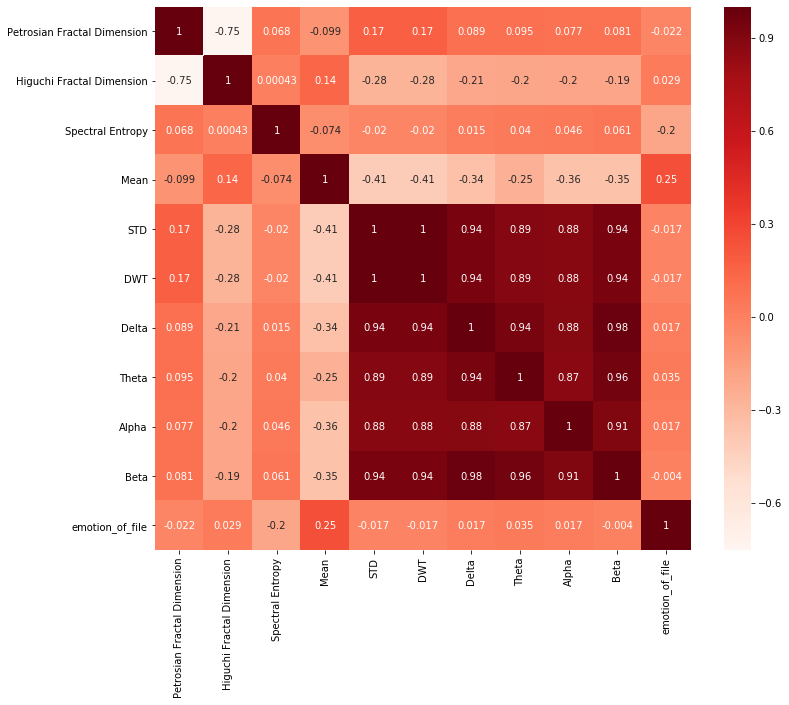

In [34]:
plt.figure(figsize=(12,10))
cor = df_merge.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
cor_target = abs(cor["emotion_of_file"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Spectral Entropy    0.201203
Mean                0.251535
emotion_of_file     1.000000
Name: emotion_of_file, dtype: float64

In [37]:
X_1 = df_merge[['Petrosian Fractal Dimension', 'Higuchi Fractal Dimension', 'Spectral Entropy', 'Mean','STD','DWT','Delta','Theta','Alpha',
          'Beta']]
# X_1 = df_merge[['Spectral Entropy', 'Mean']]    
y = df_merge['emotion_of_file']

In [38]:
X_1_train, X_1_test, Y_1_train,Y_1_test = train_test_split(X_1, y, test_size = 0.25, random_state = 0)

In [39]:
classifier_1 = SVC(kernel = 'rbf', random_state = 0)
classifier_1.fit(X_1_train, Y_1_train)
Y_1_pred = classifier_1.predict(X_1_test)

In [40]:
def con_mat_picture(y_test, y_pred, title):
    title = title
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap=plt.cm.Greens)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")

    plt.xticks([], []+ labels)
    plt.yticks([], []+ labels)
    plt.title(title)
    plt.colorbar()
    return plt.show()

In [41]:
cm = confusion_matrix(Y_1_test, Y_1_pred)

In [42]:
def con_mat_picture(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    title = title
    labels = ['0','2','3','4','5','11']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    return plt.show()

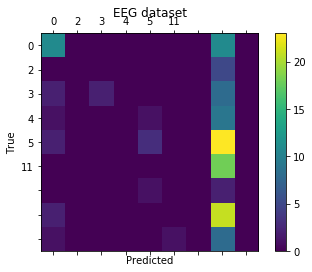

In [43]:
cm_1 = con_mat_picture(Y_1_test, Y_1_pred, 'EEG dataset')

In [44]:
print(classification_report(Y_1_test, Y_1_pred))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54        22
           1       0.00      0.00      0.00         5
           2       1.00      0.17      0.29        12
           3       0.00      0.00      0.00        11
           4       0.60      0.11      0.18        28
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00         3
          11       0.20      0.91      0.33        23
          12       0.00      0.00      0.00        10

    accuracy                           0.28       132
   macro avg       0.26      0.19      0.15       132
weighted avg       0.35      0.28      0.21       132



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [22]:
x = np.load('content/new_channels_npy/Part_10_S_Trial11_emotion_5_filtered.npy',allow_pickle=True)
#print(name)
new =np.array(x).flatten()


In [7]:
def DFA(x):
    resp = pyeeg.dfa(x)
    return resp

In [20]:
def Hjorth( x ):

    resp = pyeeg.hjorth(x)

    return resp

In [24]:
def Hurst( x ):

    resp = pyeeg.hurst(x)

    return resp